In [6]:
# Setup: Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the CSV file (same directory as this notebook)
csv_path = "final_results.csv"
df = pd.read_csv(csv_path)

# Clean the data
df["faithfulness"] = pd.to_numeric(df["faithfulness"], errors="coerce")
df["answer_relevancy"] = pd.to_numeric(df["answer_relevancy"], errors="coerce")
df = df.dropna(subset=["faithfulness", "answer_relevancy"])

print(f"✅ Loaded {len(df)} evaluation results")
print(f"   Faithfulness range: {df['faithfulness'].min():.3f} - {df['faithfulness'].max():.3f}")
print(f"   Answer Relevancy range: {df['answer_relevancy'].min():.3f} - {df['answer_relevancy'].max():.3f}")

✅ Loaded 24 evaluation results
   Faithfulness range: 0.440 - 1.000
   Answer Relevancy range: 0.501 - 1.000


## 📊 Faithfulness Score Visualization

**What is Faithfulness?**  
Measures how well the AI answers are grounded in the retrieved context.  
- **High score (0.7-1.0)**: Answers are well-supported by the context ✅  
- **Medium score (0.5-0.7)**: Answers partially use the context ⚠️  
- **Low score (0.0-0.5)**: Answers may not be well-grounded in context ❌


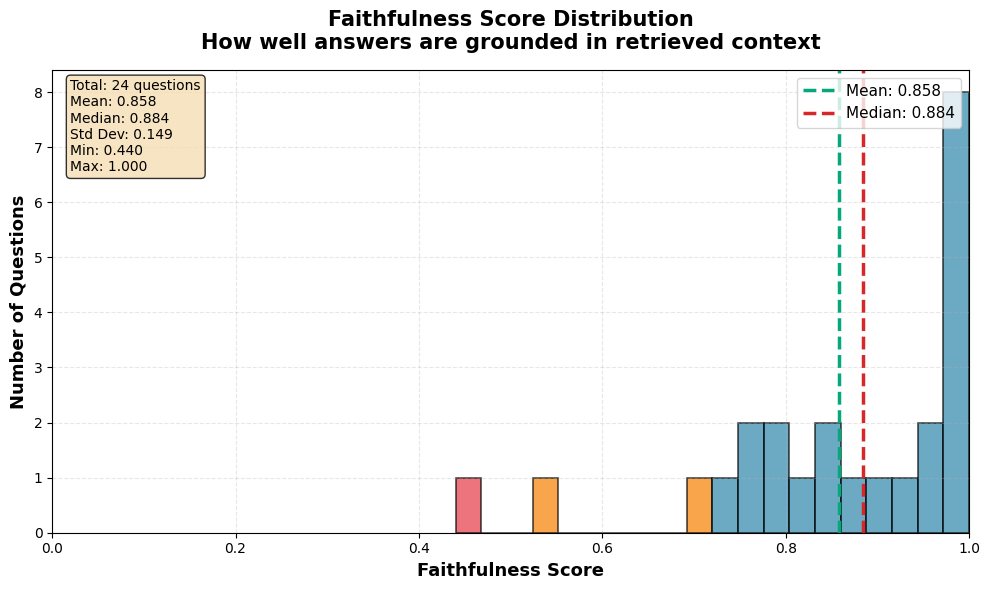

In [7]:
# Create Faithfulness Visualization
faithfulness_scores = df["faithfulness"].values

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
n_bins = 20
counts, bins, patches = ax.hist(
    faithfulness_scores,
    bins=n_bins,
    color="#2E86AB",
    alpha=0.7,
    edgecolor="black",
    linewidth=1.2,
)

# Color bars: Red (low) → Orange (medium) → Blue (high)
for i, bin_val in enumerate(bins[:-1]):
    if bin_val < 0.5:
        patches[i].set_facecolor("#E63946")  # Red
    elif bin_val < 0.7:
        patches[i].set_facecolor("#F77F00")  # Orange
    else:
        patches[i].set_facecolor("#2E86AB")  # Blue

# Add mean and median lines
mean_score = np.mean(faithfulness_scores)
median_score = np.median(faithfulness_scores)

ax.axvline(mean_score, color="#06A77D", linestyle="--", linewidth=2.5, 
           label=f"Mean: {mean_score:.3f}")
ax.axvline(median_score, color="#D62828", linestyle="--", linewidth=2.5, 
           label=f"Median: {median_score:.3f}")

# Labels and title
ax.set_xlabel("Faithfulness Score", fontsize=13, fontweight="bold")
ax.set_ylabel("Number of Questions", fontsize=13, fontweight="bold")
ax.set_title("Faithfulness Score Distribution\n" + 
             "How well answers are grounded in retrieved context", 
             fontsize=15, fontweight="bold", pad=15)
ax.grid(True, alpha=0.3, linestyle="--")
ax.legend(fontsize=11, loc="upper right")
ax.set_xlim(0, 1)

# Add statistics box
stats = f"Total: {len(faithfulness_scores)} questions\n"
stats += f"Mean: {mean_score:.3f}\n"
stats += f"Median: {median_score:.3f}\n"
stats += f"Std Dev: {np.std(faithfulness_scores):.3f}\n"
stats += f"Min: {np.min(faithfulness_scores):.3f}\n"
stats += f"Max: {np.max(faithfulness_scores):.3f}"

ax.text(0.02, 0.98, stats, transform=ax.transAxes,
        fontsize=10, verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8))

plt.tight_layout()
plt.show()


## 📊 Answer Relevancy Score Visualization

**What is Answer Relevancy?**  
Measures how relevant the AI answers are to the questions asked.  
- **High score (0.7-1.0)**: Answers directly address the question ✅  
- **Medium score (0.5-0.7)**: Answers partially address the question ⚠️  
- **Low score (0.0-0.5)**: Answers may not be relevant to the question ❌


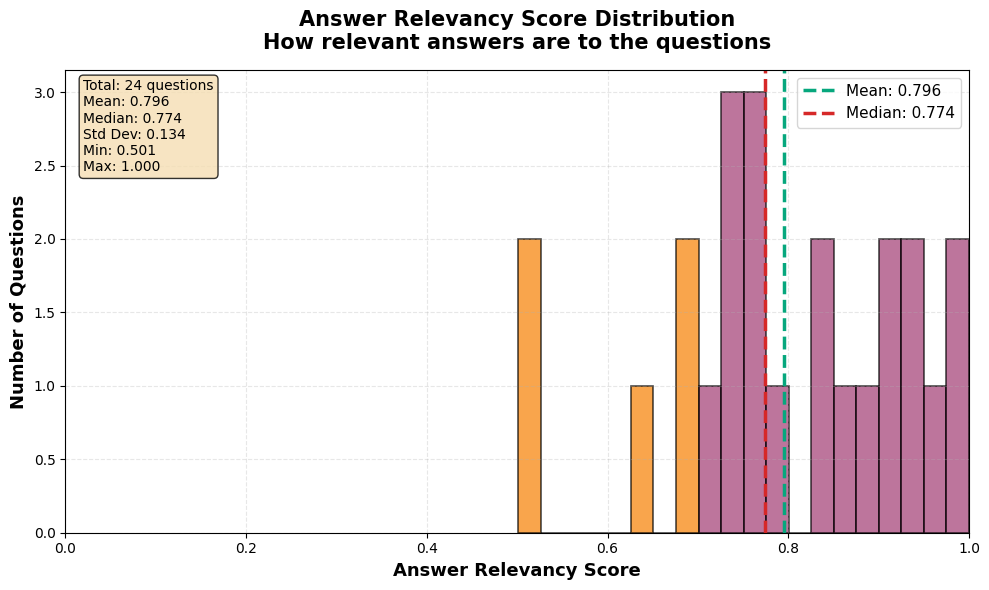

In [8]:
# Create Answer Relevancy Visualization
answer_relevancy_scores = df["answer_relevancy"].values

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
n_bins = 20
counts, bins, patches = ax.hist(
    answer_relevancy_scores,
    bins=n_bins,
    color="#A23B72",
    alpha=0.7,
    edgecolor="black",
    linewidth=1.2,
)

# Color bars: Red (low) → Orange (medium) → Purple (high)
for i, bin_val in enumerate(bins[:-1]):
    if bin_val < 0.5:
        patches[i].set_facecolor("#E63946")  # Red
    elif bin_val < 0.7:
        patches[i].set_facecolor("#F77F00")  # Orange
    else:
        patches[i].set_facecolor("#A23B72")  # Purple

# Add mean and median lines
mean_score = np.mean(answer_relevancy_scores)
median_score = np.median(answer_relevancy_scores)

ax.axvline(mean_score, color="#06A77D", linestyle="--", linewidth=2.5, 
           label=f"Mean: {mean_score:.3f}")
ax.axvline(median_score, color="#D62828", linestyle="--", linewidth=2.5, 
           label=f"Median: {median_score:.3f}")

# Labels and title
ax.set_xlabel("Answer Relevancy Score", fontsize=13, fontweight="bold")
ax.set_ylabel("Number of Questions", fontsize=13, fontweight="bold")
ax.set_title("Answer Relevancy Score Distribution\n" + 
             "How relevant answers are to the questions", 
             fontsize=15, fontweight="bold", pad=15)
ax.grid(True, alpha=0.3, linestyle="--")
ax.legend(fontsize=11, loc="upper right")
ax.set_xlim(0, 1)

# Add statistics box
stats = f"Total: {len(answer_relevancy_scores)} questions\n"
stats += f"Mean: {mean_score:.3f}\n"
stats += f"Median: {median_score:.3f}\n"
stats += f"Std Dev: {np.std(answer_relevancy_scores):.3f}\n"
stats += f"Min: {np.min(answer_relevancy_scores):.3f}\n"
stats += f"Max: {np.max(answer_relevancy_scores):.3f}"

ax.text(0.02, 0.98, stats, transform=ax.transAxes,
        fontsize=10, verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8))

plt.tight_layout()
plt.show()
